<a href="https://colab.research.google.com/github/toche7/DSEssentials/blob/Solution/Lab4_DecisionTree_STD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4.  Decision Tree

version 001

Decision Tree เป็น Model ประเภท Classification ตามเนื้อหาใน  Lecture

*** Decision Tree ใน sklearn ทำงานได้เฉพาะข้อมูลที่ตัวเลขเท่านั้น

## 1. Example of using SKlearn for model development


https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

```
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X,y)
```



| Method | Description |
| ------------|------------ |
| fit(X, y ) | Build a decision tree classifier from the training set (X, y).|
| predict(X) | Predict class or regression value for X. |
| score(X, y) | Return the mean accuracy on the given test data and labels.|

## 1.1 Data Preparation
เช่น เดียวกับ Model  อื่นที่ใช้ใน sklearn จะต้องเตรียมข้อมูลให้ตรงกับความต้องการคือ X ต้องข้อมูลประเภท 2 มิติ ขณะที่ y เป็นข้อมูลต้องเป็นคอลัมน์เดี่ยว หรือ มิติเดียวได้

ให้นำเข้าข้อมูล apple.csv เข้ามา


In [ ]:
#!wget https://raw.githubusercontent.com/toche7/DataSets/main/apple.csv

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/toche7/DataSets/main/apple.csv')
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [3]:
X = df[['Weight','Size']]

In [4]:
y = df[['Class']]

### 1.2 Create  Model Object and Train Model

In [5]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

In [6]:
dt.fit(X,y)

DecisionTreeClassifier(random_state=0)

In [7]:
dt.score(X,y)

1.0

### 1.3 Visualize Model

ทำการ uncomment code ด้านล่างด้วยการเลื่อกข้อมูลในเซลทั้งหมดแล้วกด

* windows: "control" + "/"
* mac: "command" + "/"

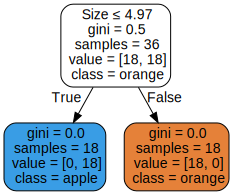

In [8]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(dt, out_file=None,
                      feature_names=X.columns,
                      class_names = df.Class.unique(),
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

### 1.4  Predict

In [9]:
dt.predict(X)

array(['orange', 'orange', 'orange', 'apple', 'orange', 'apple', 'apple',
       'apple', 'apple', 'orange', 'apple', 'apple', 'apple', 'orange',
       'apple', 'orange', 'orange', 'apple', 'orange', 'apple', 'orange',
       'orange', 'orange', 'orange', 'orange', 'apple', 'orange',
       'orange', 'apple', 'apple', 'apple', 'apple', 'orange', 'orange',
       'apple', 'apple'], dtype=object)

In [10]:
y

,Class
0,orange
1,orange
2,orange
3,apple
4,orange
5,apple
6,apple
7,apple
8,apple
9,orange


In [15]:
dt.predict([[69, 4.95]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['orange'], dtype=object)

In [11]:
X.head()

,Weight,Size
0,69,4.39
1,69,4.21
2,65,4.09
3,72,5.85
4,67,4.70


### 1.5 Score

ค่า Score ใน DT เป็นค่า Accuracy

In [16]:
dt.score(X,y)

1.0

## 2. Iris Decision Tree Model

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ตัวอย่างดอก Iris

ที่มา https://scikit-learn.org/stable/modules/tree.html

Dataset : https://en.wikipedia.org/wiki/Iris_flower_data_set

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()

In [19]:
X = pd.DataFrame(iris.data)

In [42]:
X2 = pd.DataFrame(iris.data)

In [20]:
y = pd.DataFrame(iris.target)

In [21]:
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
y[0].unique()

array([0, 1, 2])

In [27]:
dt2 = DecisionTreeClassifier(random_state=0)

In [28]:
dt2.fit(X,y)

DecisionTreeClassifier(random_state=0)

In [29]:
dt2.score(X,y)

1.0

In [30]:
X.iloc[100:110]

,0,1,2,3
100,6.3,3.3,6.0,2.5
101,5.8,2.7,5.1,1.9
102,7.1,3.0,5.9,2.1
103,6.3,2.9,5.6,1.8
104,6.5,3.0,5.8,2.2
105,7.6,3.0,6.6,2.1
106,4.9,2.5,4.5,1.7
107,7.3,2.9,6.3,1.8
108,6.7,2.5,5.8,1.8
109,7.2,3.6,6.1,2.5


In [31]:
dt2.predict(X.iloc[100:110])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 2.1 Data Prepare

ลองดูข้อมูลใน dataset

In [32]:
X['Target'] = y

In [33]:
X

,0,1,2,3,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
X.drop(3,axis = 1, inplace = True)

In [35]:
X

,0,1,2,Target
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.7,3.2,1.3,0
3,4.6,3.1,1.5,0
4,5.0,3.6,1.4,0
...,...,...,...,...
145,6.7,3.0,5.2,2
146,6.3,2.5,5.0,2
147,6.5,3.0,5.2,2
148,6.2,3.4,5.4,2


In [36]:
df

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple
9,65,4.27,orange


พล็อตกราฟดูระหว่างแกน 'sepal length (cm)' กับ 'sepal width (cm)'

<Axes: xlabel='1', ylabel='2'>

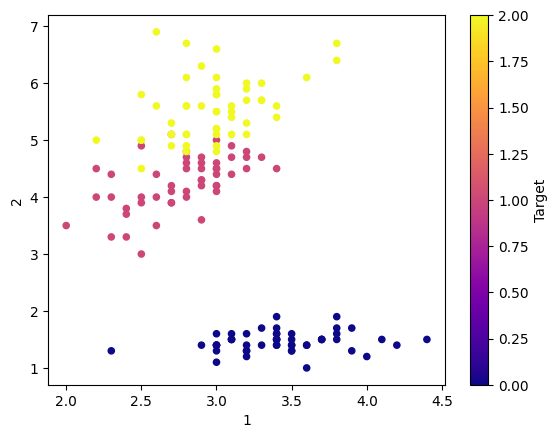

In [37]:
X.plot.scatter(1,2, c = 'Target', colormap='plasma')

In [38]:
import seaborn as sns

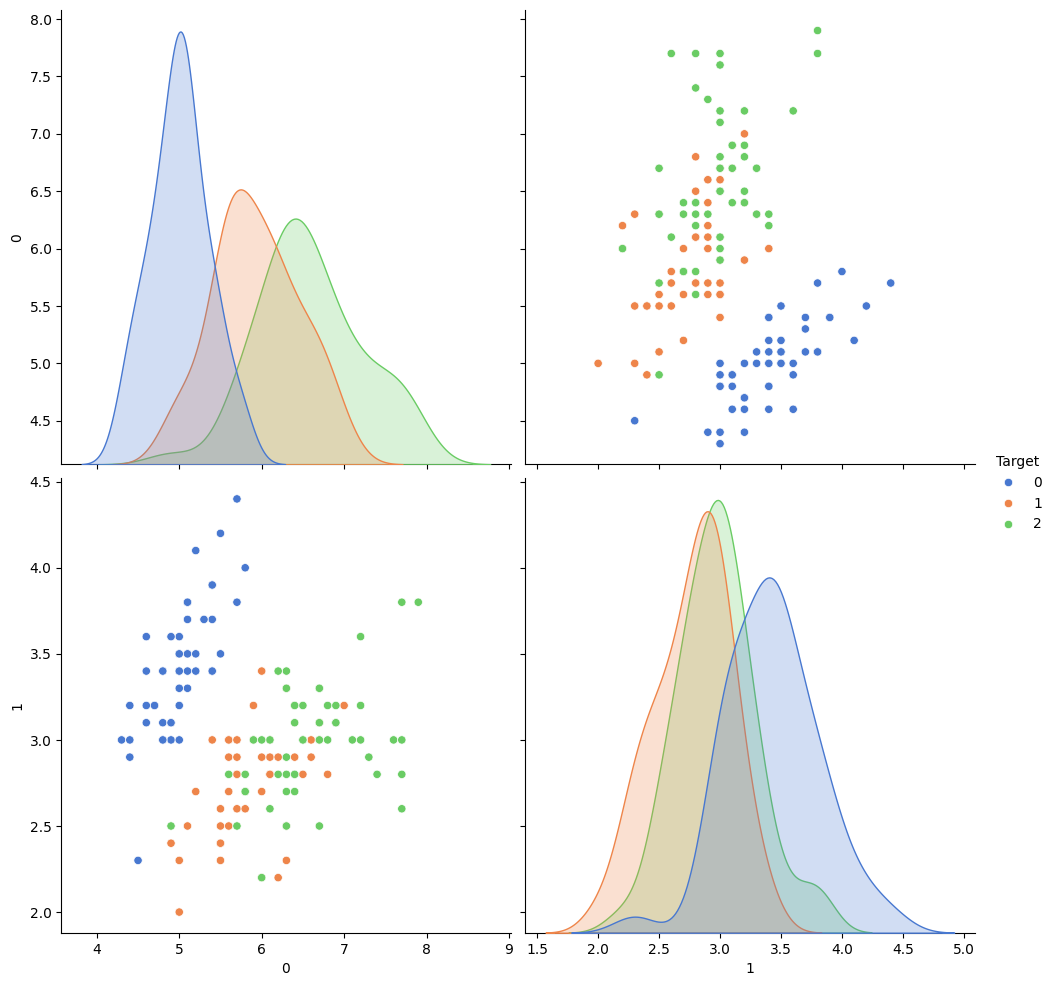

In [40]:
a=sns.pairplot(X,hue='Target',palette="muted",height=5,vars=[0,1,])

สร้างต้นไม้ตัดสินใจง่ายๆ จากชุดช้อมูล Dataset

### 2.2 Create Model Object and Train Model

In [41]:
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier()

In [43]:
modelDT.fit(X2,y)

DecisionTreeClassifier()

In [44]:
modelDT.score(X2,y)

1.0

### 2.3 Visualize Model

แสดงโครงสร้างต้นไม้ในรูปแบบ Text

In [46]:
from sklearn.tree import export_text
r = export_text(modelDT, feature_names=iris.feature_names)
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



แสดงโครงสร้างต้นไม้ในรูปแบบกราฟฟิก

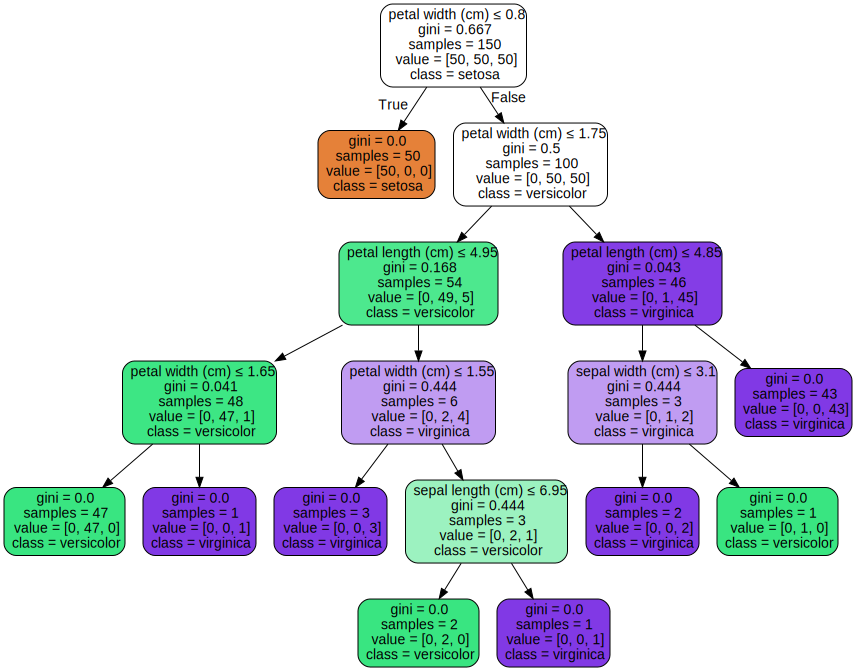

In [48]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(modelDT, out_file=None,
                      feature_names=iris.feature_names,
                      class_names=iris.target_names,
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

ลองทำนายผล

### 2.4 Apply Model (Predict)

In [49]:
X2.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
modelDT.predict([[5.5, 3.0,1.5,0.2],[4.5,5,1.4,3]])

array([0, 1])

### 2.5 Model Performance (Score)

In [52]:
modelDT.score(X2,y)

1.0

In [54]:
modelDT.criterion

'gini'

In [56]:
modelDT.max_depth